In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox,zscore
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso,Ridge,ElasticNet,SGDClassifier,SGDRegressor
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import r2_score,accuracy_score,confusion_matrix,classification_report,mean_squared_error,mean_absolute_error,roc_auc_score,f1_score,recall_score,roc_curve,auc,precision_score
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.svm import SVC,SVR
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,GradientBoostingClassifier,AdaBoostClassifier,AdaBoostRegressor,RandomForestClassifier,RandomForestRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.impute import SimpleImputer
import joblib as joblib
import warnings
warnings.filterwarnings('ignore')
from pandas.api.types import is_string_dtype,is_numeric_dtype


In [55]:
df=pd.read_csv('adult-data.csv',header=None,names=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','Income'])

In [56]:
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


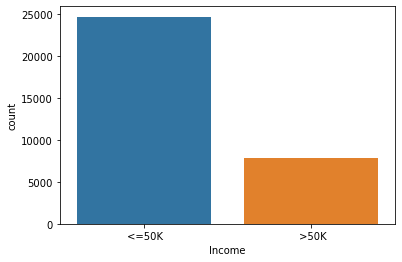

In [57]:
sns.countplot(data=df,x='Income')
#most of the people earning less than 50k in a year





In [58]:
df_filter=df[df.Income.str.contains('>50K')]


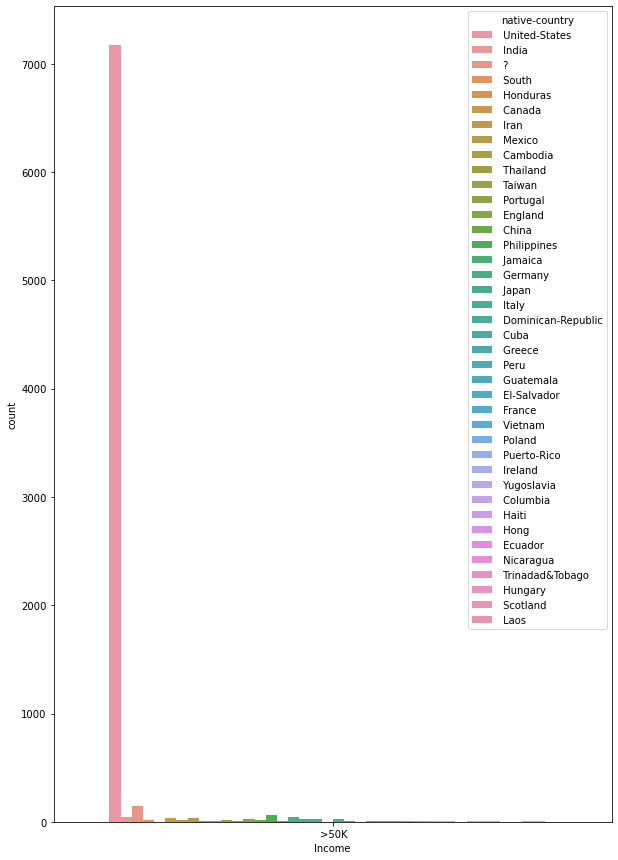

In [59]:
plt.figure(figsize=(10,15))
sns.countplot(data=df_filter,x='Income',hue='native-country')
# people in United-States have more income compare to other country people

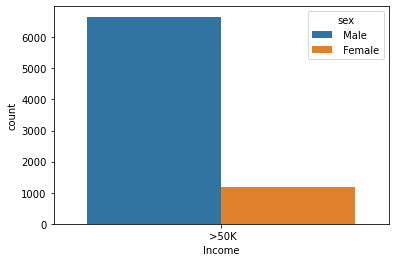

In [60]:
sns.countplot(data=df_filter,x='Income',hue='sex')
# Men  are earning more than women

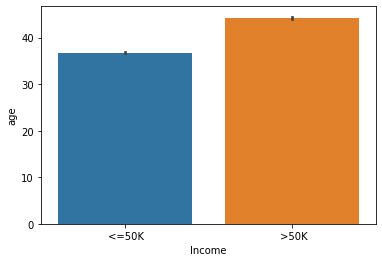

In [61]:
sns.barplot(data=df,x='Income',y='age')
#people aged 40+ earning more comapare to other

In [62]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
Income            object
dtype: object

In [63]:
for col in df.columns:
    if(is_string_dtype(df[col])):
        print('**********************************')
        print(col,'\n')
        print(df[col].value_counts())
        

**********************************
workclass 

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
**********************************
education 

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
**********************************
marital-status 

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent 

In [64]:
#from above output we found some missing values present in native-country ,occupation and workclass column 
#drop rows containing missing values
for col in df.columns:
    if(is_string_dtype(df[col])):
        idx=df[df[col].str.strip()=='?'].index
        df=df.drop(idx)


In [65]:
df['occupation'].value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

In [66]:
df.shape

(30162, 15)

In [67]:
df['capital-loss'].isin([0]).sum()

28735

In [68]:
#replacing 0 with mean
for col in df.columns:
    if(is_numeric_dtype(df[col])):
        simple_imp=SimpleImputer(missing_values=0,strategy='mean')
        simple_imp.fit(df[[col]])
        df[col]=simple_imp.fit_transform(df[[col]]).ravel()
        

In [69]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.000000,1867.898388,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,12977.596927,1867.898388,13.0,United-States,<=50K
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,12977.596927,1867.898388,40.0,United-States,<=50K
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,12977.596927,1867.898388,40.0,United-States,<=50K
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,12977.596927,1867.898388,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,Private,257302.0,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,12977.596927,1867.898388,38.0,United-States,<=50K
32557,40.0,Private,154374.0,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,12977.596927,1867.898388,40.0,United-States,>50K
32558,58.0,Private,151910.0,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,12977.596927,1867.898388,40.0,United-States,<=50K
32559,22.0,Private,201490.0,HS-grad,9.0,Never-married,Adm-clerical,Own-child,White,Male,12977.596927,1867.898388,20.0,United-States,<=50K


In [70]:
for col in df.columns:
    if(is_string_dtype(df[col])):
        labelEncoder=LabelEncoder()
        df[col]=labelEncoder.fit_transform(df[col])

In [71]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39.0,5,77516.0,9,13.0,4,0,1,4,1,2174.000000,1867.898388,40.0,38,0
1,50.0,4,83311.0,9,13.0,2,3,0,4,1,12977.596927,1867.898388,13.0,38,0
2,38.0,2,215646.0,11,9.0,0,5,1,4,1,12977.596927,1867.898388,40.0,38,0
3,53.0,2,234721.0,1,7.0,2,5,0,2,1,12977.596927,1867.898388,40.0,38,0
4,28.0,2,338409.0,9,13.0,2,9,5,2,0,12977.596927,1867.898388,40.0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,2,257302.0,7,12.0,2,12,5,4,0,12977.596927,1867.898388,38.0,38,0
32557,40.0,2,154374.0,11,9.0,2,6,0,4,1,12977.596927,1867.898388,40.0,38,1
32558,58.0,2,151910.0,11,9.0,6,0,4,4,0,12977.596927,1867.898388,40.0,38,0
32559,22.0,2,201490.0,11,9.0,4,0,3,4,1,12977.596927,1867.898388,20.0,38,0


In [72]:
corr_=df.corr()
corr_

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
age,1.000000,0.080540,-0.076511,-0.001111,0.043526,-0.276373,-0.005682,-0.246456,0.023374,0.081993,2.661387e-02,3.474685e-02,0.101599,-0.001905,0.241998
workclass,0.080540,1.000000,-0.032493,0.017855,0.037833,-0.034241,0.015572,-0.067417,0.044731,0.074973,3.062250e-02,2.087345e-02,0.050724,0.007668,0.018044
fnlwgt,-0.076511,-0.032493,1.000000,-0.027102,-0.044992,0.032163,0.000204,0.009298,-0.023895,0.025362,3.689733e-03,-2.787376e-03,-0.022886,-0.066717,-0.008957
education,-0.001111,0.017855,-0.027102,1.000000,0.345410,-0.040664,-0.038212,-0.012717,0.011154,-0.027888,2.212441e-02,1.710788e-03,0.059887,0.078790,0.078987
education-num,0.043526,0.037833,-0.044992,0.345410,1.000000,-0.063419,0.087717,-0.091935,0.032805,0.006157,7.725885e-02,2.530435e-02,0.152522,0.091555,0.335286
marital-status,-0.276373,-0.034241,0.032163,-0.040664,-0.063419,1.000000,0.022655,0.177964,-0.068627,-0.119813,-1.439869e-02,2.408364e-03,-0.189003,-0.025902,-0.193518
occupation,-0.005682,0.015572,0.000204,-0.038212,0.087717,0.022655,1.000000,-0.053727,0.000717,0.062313,1.863485e-02,-1.022446e-05,0.018365,-0.003483,0.051577
relationship,-0.246456,-0.067417,0.009298,-0.012717,-0.091935,0.177964,-0.053727,1.000000,-0.117143,-0.584876,-2.313177e-02,-3.418315e-02,-0.257850,-0.010809,-0.251003
race,0.023374,0.044731,-0.023895,0.011154,0.032805,-0.068627,0.000717,-0.117143,1.000000,0.089186,3.386831e-03,8.027067e-03,0.048532,0.124514,0.071658
sex,0.081993,0.074973,0.025362,-0.027888,0.006157,-0.119813,0.062313,-0.584876,0.089186,1.000000,1.863898e-02,3.004603e-02,0.231268,0.000618,0.216699


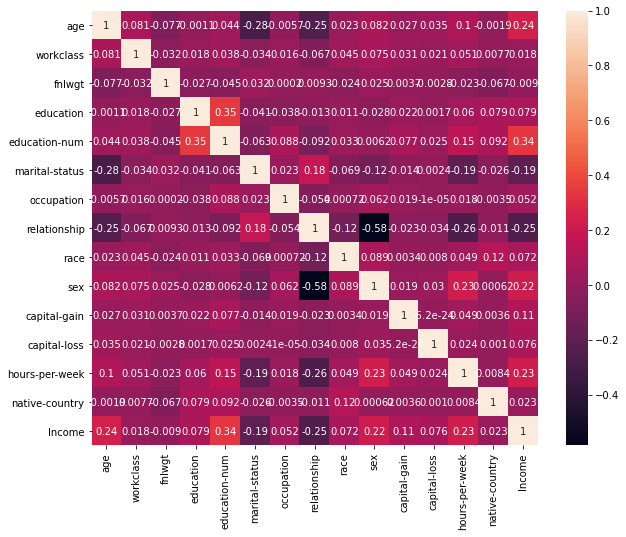

In [73]:
plt.figure(figsize=(10,8))
sns.heatmap(data=corr_,annot=True)

In [74]:
#drop relationship column
df=df.drop('relationship',axis=1)

In [75]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39.0,5,77516.0,9,13.0,4,0,4,1,2174.000000,1867.898388,40.0,38,0
1,50.0,4,83311.0,9,13.0,2,3,4,1,12977.596927,1867.898388,13.0,38,0
2,38.0,2,215646.0,11,9.0,0,5,4,1,12977.596927,1867.898388,40.0,38,0
3,53.0,2,234721.0,1,7.0,2,5,2,1,12977.596927,1867.898388,40.0,38,0
4,28.0,2,338409.0,9,13.0,2,9,2,0,12977.596927,1867.898388,40.0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,2,257302.0,7,12.0,2,12,4,0,12977.596927,1867.898388,38.0,38,0
32557,40.0,2,154374.0,11,9.0,2,6,4,1,12977.596927,1867.898388,40.0,38,1
32558,58.0,2,151910.0,11,9.0,6,0,4,0,12977.596927,1867.898388,40.0,38,0
32559,22.0,2,201490.0,11,9.0,4,0,4,1,12977.596927,1867.898388,20.0,38,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001ADB9A6FA60>,
      dtype=object)

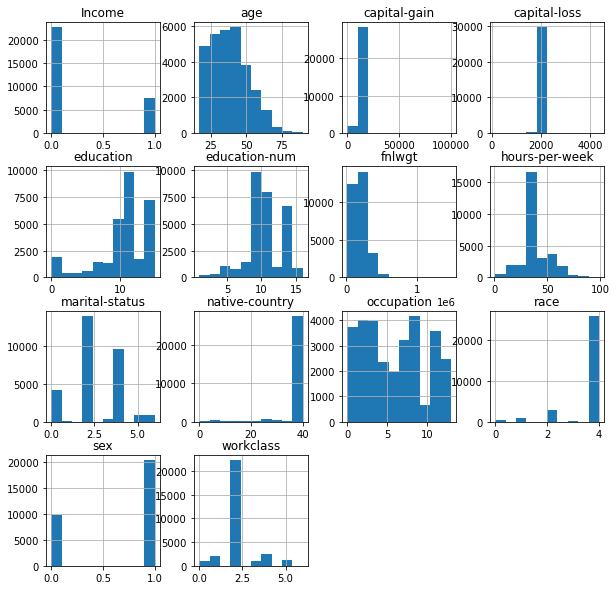

In [76]:
df.hist(figsize=(10,10))

In [77]:
#skewed data
df.skew()

age                0.530228
workclass          1.154858
fnlwgt             1.459220
education         -0.944948
education-num     -0.305379
marital-status    -0.009453
occupation         0.110450
race              -2.507036
sex               -0.750636
capital-gain      11.818108
capital-loss       0.197835
hours-per-week     0.330869
native-country    -4.178907
Income             1.161408
dtype: float64

In [78]:

df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

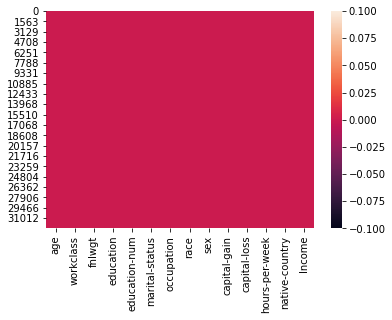

In [79]:
sns.heatmap(data=df.isnull())

In [80]:
df.describe()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
count,30162.000000,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,2.199324,1.897938e+05,10.333764,10.121312,2.580134,5.959850,3.678602,0.675685,12977.596927,1867.898388,40.931238,36.382567,0.248922
std,13.134665,0.953925,1.056530e+05,3.812292,2.549995,1.498016,4.029566,0.834709,0.468126,6471.041759,78.681803,11.979984,6.105372,0.432396
min,17.000000,0.000000,1.376900e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,114.000000,155.000000,1.000000,0.000000,0.000000
25%,28.000000,2.000000,1.176272e+05,9.000000,9.000000,2.000000,2.000000,4.000000,0.000000,12977.596927,1867.898388,40.000000,38.000000,0.000000
50%,37.000000,2.000000,1.784250e+05,11.000000,10.000000,2.000000,6.000000,4.000000,1.000000,12977.596927,1867.898388,40.000000,38.000000,0.000000
75%,47.000000,2.000000,2.376285e+05,12.000000,13.000000,4.000000,9.000000,4.000000,1.000000,12977.596927,1867.898388,45.000000,38.000000,0.000000
max,90.000000,6.000000,1.484705e+06,15.000000,16.000000,6.000000,13.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,40.000000,1.000000


age                  AxesSubplot(0.125,0.749828;0.227941x0.130172)
workclass         AxesSubplot(0.398529,0.749828;0.227941x0.130172)
fnlwgt            AxesSubplot(0.672059,0.749828;0.227941x0.130172)
education            AxesSubplot(0.125,0.593621;0.227941x0.130172)
education-num     AxesSubplot(0.398529,0.593621;0.227941x0.130172)
marital-status    AxesSubplot(0.672059,0.593621;0.227941x0.130172)
occupation           AxesSubplot(0.125,0.437414;0.227941x0.130172)
race              AxesSubplot(0.398529,0.437414;0.227941x0.130172)
sex               AxesSubplot(0.672059,0.437414;0.227941x0.130172)
capital-gain         AxesSubplot(0.125,0.281207;0.227941x0.130172)
capital-loss      AxesSubplot(0.398529,0.281207;0.227941x0.130172)
hours-per-week    AxesSubplot(0.672059,0.281207;0.227941x0.130172)
native-country          AxesSubplot(0.125,0.125;0.227941x0.130172)
Income               AxesSubplot(0.398529,0.125;0.227941x0.130172)
dtype: object

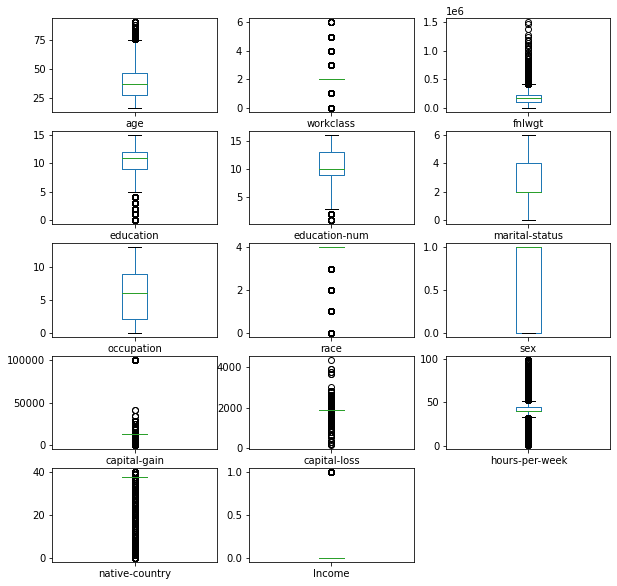

In [81]:
df.plot.box(layout=(5,3),subplots=True,figsize=(10,10))

In [82]:
#remove outliers
z=np.abs(zscore(df))
df=df[(z<3).all(axis=1)]
df.shape

(26602, 14)

In [83]:
#split feature and target variable
x=df.drop('Income',axis=1)
y=df['Income']
print(x.shape,y.shape)

(26602, 13) (26602,)


In [84]:
x.skew()

age               0.429716
workclass         1.172936
fnlwgt            0.629770
education        -0.969861
education-num    -0.129189
marital-status   -0.020117
occupation        0.119476
race             -2.670468
sex              -0.747609
capital-gain     -2.977847
capital-loss     -1.551907
hours-per-week   -0.283572
native-country   -5.403105
dtype: float64

In [85]:
#remove skewed data where skewness is > 0.55
for col in x.columns:
    if(x[col].skew()>0.55):
        x[col]=np.log1p(x[col])

In [86]:
x.skew()

age               0.429716
workclass        -0.883573
fnlwgt           -0.953992
education        -0.969861
education-num    -0.129189
marital-status   -0.020117
occupation        0.119476
race             -2.670468
sex              -0.747609
capital-gain     -2.977847
capital-loss     -1.551907
hours-per-week   -0.283572
native-country   -5.403105
dtype: float64

In [87]:
x

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39.0,1.791759,11.258253,9,13.0,4,0,4,1,2174.000000,1867.898388,40.0,38
1,50.0,1.609438,11.330348,9,13.0,2,3,4,1,12977.596927,1867.898388,13.0,38
2,38.0,1.098612,12.281398,11,9.0,0,5,4,1,12977.596927,1867.898388,40.0,38
3,53.0,1.098612,12.366157,1,7.0,2,5,2,1,12977.596927,1867.898388,40.0,38
5,37.0,1.098612,12.558780,12,14.0,2,3,4,0,12977.596927,1867.898388,40.0,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,1.098612,12.458010,7,12.0,2,12,4,0,12977.596927,1867.898388,38.0,38
32557,40.0,1.098612,11.947140,11,9.0,2,6,4,1,12977.596927,1867.898388,40.0,38
32558,58.0,1.098612,11.931050,11,9.0,6,0,4,0,12977.596927,1867.898388,40.0,38
32559,22.0,1.098612,12.213500,11,9.0,4,0,4,1,12977.596927,1867.898388,20.0,38


In [88]:
#scaling x data
sd=StandardScaler();
x=sd.fit_transform(x)
x

array([[ 0.06799768,  2.21508638, -1.16936616, ..., -0.02421804,
        -0.04971637,  0.18848644],
       [ 0.92554276,  1.61706393, -1.05195885, ..., -0.02421804,
        -2.55789793,  0.18848644],
       [-0.00996096, -0.05846579,  0.49682737, ..., -0.02421804,
        -0.04971637,  0.18848644],
       ...,
       [ 1.54921191, -0.05846579, -0.07371467, ..., -0.02421804,
        -0.04971637,  0.18848644],
       [-1.25729925, -0.05846579,  0.38625526, ..., -0.02421804,
        -1.90762864,  0.18848644],
       [ 1.08146005,  0.88514361,  0.96757431, ..., -0.02421804,
        -0.04971637,  0.18848644]])

In [89]:
def findBestParam(reg_obj,param_arr):
    grid_cv=GridSearchCV(reg_obj,param_arr,cv=10)
    grid_cv.fit(x,y)
    return grid_cv.best_params_

In [90]:
params_={'kernel':['linear','rbf','poly']}
svr=SVC()
print("dtree_reg best param :",findBestParam(svr,params_))


dtree_reg best param : {'kernel': 'rbf'}


In [91]:
params_={'criterion':['gini','entropy'],'max_depth':[2,5,10]}
dtree_reg=DecisionTreeClassifier()
print("dtree_reg best param :",findBestParam(dtree_reg,params_))


dtree_reg best param : {'criterion': 'gini', 'max_depth': 10}


In [92]:
params_={'n_neighbors':[5,10,15,20]}
kn_reg=KNeighborsClassifier()
print("kn_reg best param :",findBestParam(kn_reg,params_))


kn_reg best param : {'n_neighbors': 15}


In [93]:
params_={'alpha':[0.0001,0.001,0.01,0.1,1.0],'penalty':['l1','l2','elasticnet']}
sgd_reg=SGDClassifier()
print("sgd_reg best param :",findBestParam(sgd_reg,params_))


sgd_reg best param : {'alpha': 0.001, 'penalty': 'l1'}


In [94]:
params_={'learning_rate':[0.0001,0.001,0.01,0.1,1.0]}
gradient_reg=GradientBoostingClassifier()
print("gradient_reg best param :",findBestParam(gradient_reg,params_))


gradient_reg best param : {'learning_rate': 0.1}


In [95]:
params_={'learning_rate':[0.0001,0.001,0.01,0.1,1.0],'base_estimator':[dtree_reg,kn_reg,sgd_reg]}
ada_reg=AdaBoostClassifier()
print("ada_reg best param :",findBestParam(ada_reg,params_))


ada_reg best param : {'base_estimator': DecisionTreeClassifier(), 'learning_rate': 1.0}


In [96]:
params_={'n_estimators':[10,50,100,150,200],'max_depth':[2,5,10,15],'criterion':['gini','entropy']}
rand_reg=RandomForestClassifier()
print("rand_reg best param :",findBestParam(rand_reg,params_))

rand_reg best param : {'criterion': 'gini', 'max_depth': 15, 'n_estimators': 100}


In [97]:
lr=LogisticRegression()
mul_nb=MultinomialNB()
gaus_nb=GaussianNB()
svr=SVC(kernel='rbf')
dtree_reg=DecisionTreeClassifier(criterion='gini',max_depth=10)
kn_reg=KNeighborsClassifier(n_neighbors=20)
sgd_reg=SGDClassifier(alpha=0.01,penalty='l2')
gradient_reg=GradientBoostingClassifier(learning_rate=0.1)
ada_reg=AdaBoostClassifier(learning_rate=1.0,base_estimator=dtree_reg)
rand_reg=RandomForestClassifier(n_estimators=100,max_depth=15,criterion='gini')

In [98]:
models=[]
models.append(('LogisticRegression',lr))
models.append(('SVC',svr))
models.append(('DecisionTreeClassifier',dtree_reg))
models.append(('KNeighborsClassifier',kn_reg))
models.append(('SGDClassifier',sgd_reg))
models.append(('GaussianNB',gaus_nb))
#models.append(('MultinomialNB',mul_nb))
models.append(('Gradient Boost',gradient_reg))
models.append(('Ada Boost',ada_reg ))
models.append(('RandomForestClassifier',rand_reg))

In [99]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [100]:
#finding and storing matrix model wise
cross_val_list=[]
accuracy_list=[]
model_name_list=[]
roc_auc_score_list=[]
f1_score_list=[]
precission_score_list=[]
recall_score_list=[]

for reg_name,reg_obj in models:
    reg_obj.fit(x_train,y_train)
    y_pred=reg_obj.predict(x_test)
    cross_val_list.append(cross_val_score(reg_obj,x,y,cv=10,scoring='accuracy').mean())
    accuracy_list.append(accuracy_score(y_test,y_pred))
    roc_auc_score_list.append(roc_auc_score(y_test,y_pred))
    f1_score_list.append(f1_score(y_test,y_pred))
    precission_score_list.append(precision_score(y_test,y_pred))
    recall_score_list.append(recall_score(y_test,y_pred))
    model_name_list.append(reg_name)
    

In [101]:
df_matrix=pd.DataFrame({'Estimator_Name':model_name_list,'cross_val_Score':cross_val_list,'accuracy_score':accuracy_list,'roc_auc_score':roc_auc_score_list,'f1_score':f1_score_list,'precision_Score':precission_score_list,'recall_score':recall_score_list})
df_matrix

,Estimator_Name,cross_val_Score,accuracy_score,roc_auc_score,f1_score,precision_Score,recall_score
0,LogisticRegression,0.801444,0.803608,0.679565,0.523049,0.661663,0.432453
1,SVC,0.842005,0.843450,0.741908,0.631905,0.762260,0.539623
2,DecisionTreeClassifier,0.846516,0.848149,0.750081,0.645303,0.771249,0.554717
3,KNeighborsClassifier,0.833058,0.836121,0.741317,0.626712,0.724036,0.552453
4,SGDClassifier,0.802459,0.800977,0.652085,0.470765,0.696746,0.355472
5,GaussianNB,0.773814,0.767901,0.755928,0.611024,0.524324,0.732075
6,Gradient Boost,0.862003,0.863935,0.781275,0.692960,0.790900,0.616604
7,Ada Boost,0.810428,0.806427,0.722808,0.588658,0.625106,0.556226
8,RandomForestClassifier,0.856515,0.855290,0.774258,0.678363,0.759588,0.612830


In [102]:
#from above matrix Random Forest Classifier working better compare to other estimator .

rand_reg.fit(x_train,y_train)
y_pred=rand_reg.predict(x_test)
print('score',rand_reg.score(x_train,y_train))
print('accuracy_score',accuracy_score(y_test,y_pred))
print('confusion_matrix \n',confusion_matrix(y_test,y_pred))
print('classification_report',classification_report(y_test,y_pred))

#precision: percent of correct prediction(+ve/-ve)
#recall:what % of +ve cases did you catch
#f1-score:percent of correct +ve prediction


score 0.9070062497063108
accuracy_score 0.855102424356324
confusion_matrix 
 [[3750  246]
 [ 525  800]]
classification_report               precision    recall  f1-score   support

           0       0.88      0.94      0.91      3996
           1       0.76      0.60      0.67      1325

    accuracy                           0.86      5321
   macro avg       0.82      0.77      0.79      5321
weighted avg       0.85      0.86      0.85      5321



0.7711060116720493


Text(0, 0.5, 'True +ve Rate')

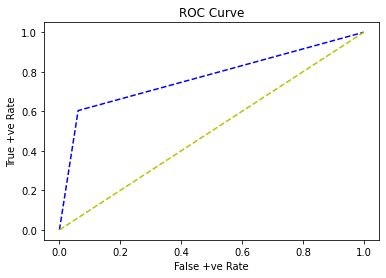

In [103]:
#roc curve
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
roc_auc=auc(fpr,tpr)
print(roc_auc)
plt.plot(fpr,tpr,'b--')
plt.plot([0,1],[0,1],'y--')
#plt.legend(loc='lower right')
plt.title('ROC Curve')
plt.xlabel('False +ve Rate')
plt.ylabel('True +ve Rate')


In [104]:
joblib.dump(gradient_reg,'Income_Prediction.pkl')

['Income_Prediction.pkl']